# IEOR 4703 -- Monte Carlo Simulation for FE

### Implementation of a delta-hedging strategy for a call option

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

# import our BMS price and delta functions
from BMS import BMS_price, BMS_delta


In [ ]:
spot = 100
K = 110
r = 0.40
q = 0.0
sig = 0.40

maturity = 2

m = 52
dt = maturity/m

n_sim = 1000

Compute the true value of the call

In [ ]:
C = BMS_price('call', spot, K, r, q, sig, maturity)
P = BMS_price('put', spot, K, r, q, sig, maturity)
print('Under Black-Merton-Scholes, exact value of call = ' + str(C) + ' & put = '  + str(P))

Under Black-Merton-Scholes, exact value of call = 52.54910878941347 & put = 1.9752948423078394


## Cost of constant delta-hedging strategy

In [ ]:
np.random.seed(1667134)
z = np.random.randn(n_sim, m)

In [ ]:
synthetic_C = np.zeros(n_sim)
synthetic_P = np.zeros(n_sim)

st = time()

for j in range(n_sim):

    # reset for each path
    S = spot
    T = maturity

    delta_C_prev = 0.0
    delta_P_prev = 0.0

    for i in range(m):

        delta_C = BMS_delta('call', S, K, r, q, sig, T)
        delta_P = BMS_delta('put',  S, K, r, q, sig, T)

        synthetic_C[j] += (delta_C - delta_C_prev)*S*np.exp(-r*i*dt)
        synthetic_P[j] += (delta_P - delta_P_prev)*S*np.exp(-r*i*dt)

        delta_C_prev = delta_C
        delta_P_prev = delta_P
        #z = np.random.randn()
        S = S * np.exp((r - q - sig*sig/2)*dt + sig*np.sqrt(dt)*z[j,i])

        T = T - dt

    # final hedge close-out: sell/buy delta_T shares at S_T and discount to t=0
    synthetic_C[j] += -delta_C*S*np.exp(-r*maturity)
    synthetic_P[j] += -delta_P*S*np.exp(-r*maturity)

    # discounting the payoff
    synthetic_C[j] += np.maximum(S-K,0)*np.exp(-r*maturity)
    synthetic_P[j] += np.maximum(K-S,0)*np.exp(-r*maturity)


et = time()
print('Elapsed time is %s seconds.' % str(et - st))

Elapsed time is 9.349690675735474 seconds.


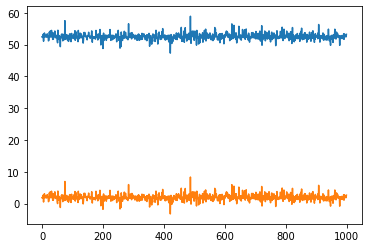

In [ ]:
plt.plot(synthetic_C)
plt.plot(synthetic_P)
plt.show()

In [ ]:
print('Exact value of call for r='+ str(r) + ', q=' + str(q) + ', C = ' + str(C))
print('mean_synthetic_C = ' + str(np.mean(synthetic_C)))
print('std_synthetic_C = '  + str(np.std(synthetic_C, ddof=1)))
print(' ')
print('Exact value of put for r='+ str(r) + ', q=' + str(q) + ', P = ' + str(P))
print('mean_synthetic_P = ' + str(np.mean(synthetic_P)))
print('std_synthetic_P = '  + str(np.std(synthetic_P, ddof=1)))


Exact value of call for r=0.4, q=0.0, C = 52.54910878941347
mean_synthetic_C = 52.5345214849075
std_synthetic_C = 0.9664072438922486
 
Exact value of put for r=0.4, q=0.0, P = 1.9752948423078394
mean_synthetic_P = 1.9607075378018626
std_synthetic_P = 0.9664072438922479
